1. Hình ảnh và pixel:
Hình ảnh được coi là một bức ảnh gồm nhiều pixel. Mỗi pixel đại diện cho một điểm trên bức ảnh và có thể hiểu như là một ô vuông nhỏ nhưng rất nhỏ trên màn hình. Các pixel này sẽ cùng nhau tạo thành một bức ảnh hoàn chỉnh.

2. MNIST dataset và bài toán nhận diện chữ số viết tay:
MNIST dataset là một bộ dữ liệu trong trí tuệ nhân tạo thường được sử dụng để huấn luyện và kiểm tra các mô hình nhận diện chữ số viết tay. Nó bao gồm các hình ảnh xám của các chữ số viết tay, mỗi hình ảnh có kích thước 28x28 pixel. Đối với các hình ảnh xám như MNIST, giá trị của mỗi pixel có thể là các con số từ 0 đến 255, biểu thị cường độ ánh sáng của pixel.

3. Mảng đa chiều (Multi-dimensional arrays) và tensors:
Trong Python, ta sử dụng thư viện numpy để làm việc với mảng đa chiều hiệu quả. Mảng đa chiều này cũng được gọi là tensor. Ví dụ, hình ảnh 2D như MNIST có thể được biểu diễn bằng một tensor 2D (mảng hai chiều) với kích thước 28x28. Tương tự, hình ảnh màu (color image) sẽ được biểu diễn bằng một tensor 3D với kích thước HxWx3 (H là chiều cao, W là chiều rộng, và 3 là số lượng các thành phần màu - R, G, B).

4. Biểu diễn một video dưới dạng tensor:
Sử dụng tensor, ta có thể lưu trữ và biểu diễn video dưới dạng chuỗi các hình ảnh liên tiếp. Ví dụ, để biểu diễn một đoạn video gồm 200 khung hình với kích thước 800x600, ta có thể sử dụng tensor có kích thước 200x600x800x3. Tức là tensor này chứa 200 hình ảnh, mỗi hình ảnh có kích thước 600x800 và có 3 thành phần màu (RGB).

Nhờ sử dụng tensor, ta có thể tiện lợi trong việc lưu trữ, xử lý và huấn luyện dữ liệu hình ảnh và video trong các bài toán thị giác máy tính.

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

# In this tutorial, we will be training a lot of models. In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.12.0


In [5]:
# Pre-fetch the data for the Learn Module
!mkdir -p ~/.keras/datasets
!wget -P ~/.keras/datasets -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/data/mnist.npz

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


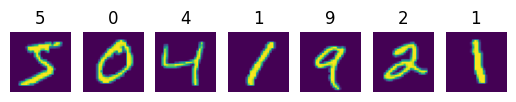

In [7]:
fig,ax = plt.subplots(1,7)
for i in range(7):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])
    ax[i].axis('off')

In [8]:
print('Training samples:',len(x_train))
print('Test samples:',len(x_test))

print('Tensor size:',x_train[0].shape)
print('First 10 digits are:', y_train[:10])
print('Type of data is ',type(x_train))

Training samples: 60000
Test samples: 10000
Tensor size: (28, 28)
First 10 digits are: [5 0 4 1 9 2 1 3 1 4]
Type of data is  <class 'numpy.ndarray'>


In [9]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [12]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), 
        keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Anatomy of a Dense Layer

Đoạn mã dưới giải thích cách tính số lượng tham số (parameters) trong một lớp dense (fully connected layer) trong mạng neural.

Đầu tiên, mạng neural của bạn có một lớp dense với 784 inputs và 10 outputs. Trong mạng này, inputs là vector có 784 số (biểu thị 784 pixels của một ảnh), và outputs là vector có 10 số (biểu thị các lớp đầu ra, ví dụ: 10 lớp đối tượng phân loại).

Trong mạng dense, mỗi output được tính bằng cách thực hiện phép nhân giữa ma trận trọng số (weight matrix) W có kích thước 784x10 và vector input x có kích thước 784, sau đó cộng thêm vector bias b có kích thước 10. Tức là output z sẽ được tính theo công thức: z = W × x + b.

Trong lý thuyết, ta cần 784x10 + 10 = 7850 tham số để thực hiện phép tính như trên, bao gồm 7840 tham số cho weight matrix W và 10 tham số cho vector bias b.

Lưu ý rằng nếu ta chỉ sử dụng ma trận W mà không có vector bias b, phép nhân sẽ biểu diễn một phép biến đổi tuyến tính mà đi qua gốc tọa độ (0,0). Điều này không đủ để thực hiện phân loại các lớp đối tượng khác nhau vì nó chỉ tạo thành các đường thẳng đi qua gốc tọa độ.

Trong Keras, để truy xuất weight matrix và bias vector của lớp dense, bạn có thể sử dụng model.layers[1] (trong trường hợp này, lớp dense là lớp thứ hai trong mô hình). Sau đó, bạn có thể sử dụng các thuộc tính của lớp này để lấy thông tin về các tham số.

In [13]:
model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.0727523 ,  0.01299318,  0.00770351, ...,  0.00494099,
          0.05959844,  0.06471125],
        [ 0.02148146,  0.04770041,  0.07998625, ...,  0.06605055,
          0.08343106, -0.07496466],
        [-0.04842557,  0.0681025 , -0.02693163, ..., -0.03443396,
         -0.04454903, -0.02656811],
        ...,
        [-0.02188909, -0.02167375,  0.06160126, ..., -0.01522781,
         -0.06726445, -0.00298483],
        [-0.02625611, -0.032436  ,  0.06434547, ...,  0.03632622,
          0.0139192 ,  0.00459795],
        [ 0.02497987, -0.00749149,  0.02910539, ...,  0.01422016,
         -0.01105033, -0.0048473 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [14]:
print('Digit to be predicted: ',y_train[0])
model(np.expand_dims(x_train[0],0))

Digit to be predicted:  5


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.07153662, 0.0664001 , 0.307047  , 0.04690917, 0.08204138,
        0.10606521, 0.12392548, 0.06739779, 0.02951491, 0.09916224]],
      dtype=float32)>

# Training the network

In [15]:
model.compile(optimizer='sgd',loss='categorical_crossentropy')

Optimizer (Bộ tối ưu hóa): Bộ tối ưu hóa sẽ được sử dụng để giảm thiểu sai số (error) của mô hình. Optimizer đơn giản nhất là stochastic gradient descent (SGD), nhưng trong các mạng nơ-ron phức tạp hơn, chúng ta thường sử dụng các bộ tối ưu hóa khác như Adam.

Loss function (Hàm mất mát): Hàm mất mát sẽ được sử dụng để tính sai số trên kết quả đầu ra của mạng và từ đó giảm thiểu sai số này. Trong mô hình này, chúng ta sử dụng categorical cross-entropy làm hàm mất mát.

Để huấn luyện mạng, chúng ta cần cung cấp đầu ra dự kiến (expected outputs) cho mỗi mẫu huấn luyện. Với bài toán phân loại đa lớp như trong ví dụ này, mạng sẽ đưa ra xác suất cho từng chữ số từ 0 đến 9 (các chữ số).

Chúng ta cần các đầu ra dự kiến có cùng cấu trúc, tức là một vector gồm 10 số, trong đó chỉ có một vị trí có giá trị 1, còn lại là 0. Đây được gọi là one-hot encoding. Ví dụ, chữ số 5 sẽ được mã hóa one-hot bằng một vector (0 0 0 0 0 1 0 0 0 0).

Chúng ta có thể dễ dàng mã hóa one-hot cho các nhãn huấn luyện bằng Keras API.

In [16]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First 3 training labels:",y_train[:3])
print("One-hot-encoded version:\n",y_train_onehot[:3])

First 3 training labels: [5 0 4]
One-hot-encoded version:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
model.fit(x_train,y_train_onehot)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.7696


# Monitoring Traning

trong quá trình huấn luyện mạng nơ-ron, chúng ta thường muốn lặp qua tập dữ liệu huấn luyện nhiều lần, mỗi lần được gọi là một epoch. Điều này giúp mô hình học được càng nhiều thông tin từ dữ liệu và cải thiện độ chính xác của mô hình theo thời gian.

Để xác định số lượng epoch, chúng ta có thể sử dụng một tham số để chỉ định số lượng lần lặp qua tập dữ liệu huấn luyện. Ví dụ, nếu chúng ta muốn huấn luyện mô hình trong 10 epoch, chúng ta có thể thiết lập tham số này thành 10.

In [18]:
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4557 - val_loss: 0.4011
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4033 - val_loss: 0.3682
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3770 - val_loss: 0.3486


 trong Keras của TensorFlow, hàm fit khi huấn luyện mô hình sẽ trả về một đối tượng history. Đối tượng history chứa thông tin về các giá trị mất mát (loss) của mô hình trong mỗi epoch trong quá trình huấn luyện. Thông tin này có thể được sử dụng để vẽ đồ thị và giúp hiểu rõ hơn về sự học của mô hình qua từng epoch.

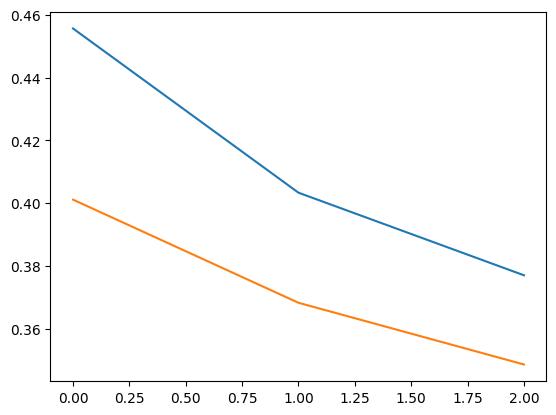

In [19]:
for x in ['loss','val_loss']:
    plt.plot(hist.history[x])

# Metrics and Minibatches

In [20]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=3,batch_size=128)

Epoch 1/3
469/469 [==============================] - 1s 2ms/step - loss: 0.3645 - acc: 0.9002 - val_loss: 0.3453 - val_acc: 0.9070
Epoch 2/3
469/469 [==============================] - 1s 2ms/step - loss: 0.3607 - acc: 0.9011 - val_loss: 0.3420 - val_acc: 0.9076
Epoch 3/3
469/469 [==============================] - 1s 1ms/step - loss: 0.3573 - acc: 0.9021 - val_loss: 0.3390 - val_acc: 0.9081


Thêm vào việc sử dụng các chỉ số độ chính xác mới, chúng ta đã xác định tham số batch_size để xác định số lượng mẫu được xử lý bởi mạng nơ-ron một lúc. Vì tính toán trên GPU có thể được song song hóa dễ dàng, việc xử lý nhiều mẫu cùng một lúc làm cho quá trình huấn luyện hiệu quả hơn. Kích thước batch lớn đáng kể làm tăng tốc quá trình học, nhưng cũng làm cho nó ít chính xác hơn một chút. Điều này xuất phát từ việc hướng tối ưu hóa được lựa chọn cho toàn bộ batch (nhóm mẫu), chứ không phải cho từng mẫu riêng lẻ. Do đó, việc chọn kích thước batch là khá phức tạp và vẫn là một trong số các siêu tham số có thể được tối ưu hóa để đạt được hiệu suất tốt hơn.

Ưu điểm của kích thước batch lớn:

Tốc độ huấn luyện nhanh hơn: Xử lý nhiều mẫu song song tirên GPU tận dụng được tính toán song song và có thể làm tăng tốc quá trình huấn luyện.
Hội tụ ổn định hơn: Hướng tối ưu hóa được lấy trung bình trên batch, điều này có thể dẫn đến hội tụ ổn định và nhất quán hơn trong quá trình huấn luyện.
Nhược điểm của kích thước batch lớn:

Yêu cầu bộ nhớ cao hơn: Kích thước batch lớn sử dụng nhiều bộ nhớ hơn, đặc biệt khi làm việc với các mạng nơ-ron lớn hoặc có giới hạn bộ nhớ GPU.
Giảm độ chính xác: Với kích thước batch lớn, các gradient được sử dụng để cập nhật các tham số của mô hình là trung bình trên nhiều mẫu. Điều này có thể dẫn đến việc cập nhật không chính xác hơn và làm chậm quá trình học.
Việc chọn kích thước batch phù hợp phụ thuộc vào tập dữ liệu cụ thể, kiến trúc mô hình và các tài nguyên phần cứng có sẵn. Kích thước batch nhỏ thường được sử dụng khi làm việc với bộ nhớ hạn chế hoặc mô hình lớn. Ngược lại, kích thước batch lớn được ưu tiên khi huấn luyện trên GPU hoặc TPU mạnh để tận dụng tính toán song song.

Lưu ý rằng kích thước batch chỉ là một trong nhiều siêu tham số cần được điều chỉnh để đạt được hiệu suất tốt cho một bài toán cụ thể. Các siêu tham số khác như tỷ lệ học (learning rate), số epoch và kiến trúc mạng nơ-ron cũng có thể ảnh hưởng đáng kể đến hiệu suất của mô hình. Việc tinh chỉnh siêu tham số là một quá trình lặp lại mà liên quan đến thử nghiệm các kết hợp khác nhau và đánh giá hiệu suất của mô hình trên tập dữ liệu validation để tìm cấu hình tốt nhất cho bài toán cụ thể.

In [21]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28,28)), 
        keras.layers.Dense(10,activation='softmax')])
model.compile(optimizer=keras.optimizers.SGD(momentum=0.5),loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(x_train,y_train_onehot,validation_data=(x_test,y_test_onehot), epochs=5, batch_size=64)  

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.7799 - acc: 0.8159 - val_loss: 0.4807 - val_acc: 0.8804
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4577 - acc: 0.8803 - val_loss: 0.4006 - val_acc: 0.8939
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4044 - acc: 0.8911 - val_loss: 0.3675 - val_acc: 0.9004
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3777 - acc: 0.8965 - val_loss: 0.3487 - val_acc: 0.9049
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.3609 - acc: 0.9005 - val_loss: 0.3362 - val_acc: 0.9088


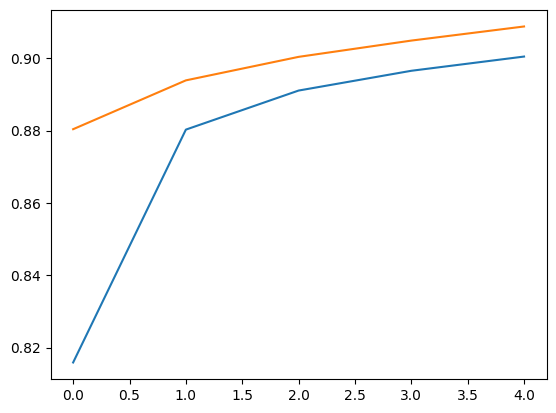

In [22]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

chúng ta hãy thể hiện trực quan các trọng số của mạng nơ-ron. Trong ví dụ mạng nơ-ron một lớp này, bộ trọng số sẽ có kích thước là 784x10 (giả sử hình ảnh đầu vào có 784 đặc trưng và chúng ta đang phân loại 10 chữ số).

Để truy cập vào bộ trọng số, bạn có thể sử dụng phương thức model.get_weights() sau khi mô hình đã được huấn luyện. Kết quả trả về sẽ là một danh sách các mảng numpy, trong đó phần tử đầu tiên tương ứng với ma trận trọng số.

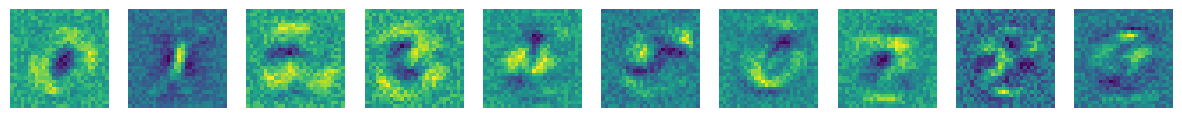

In [23]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

# Multi-layer perceptron

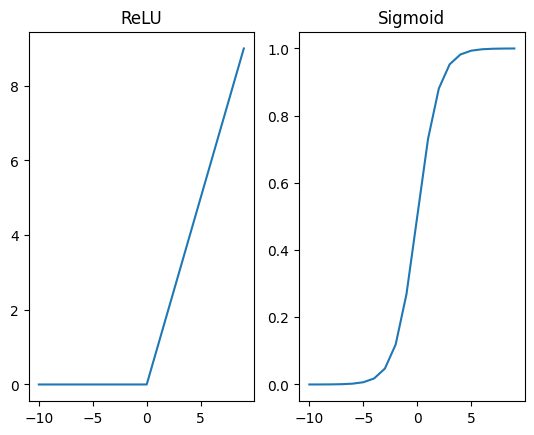

In [24]:
def plot_function(f,name=''):
    plt.plot(range(-10,10), [f(tf.constant(x,dtype=tf.float32)) for x in range(-10,10)])
    plt.title(name)

plt.subplot(121)
plot_function(tf.nn.relu,'ReLU')
plt.subplot(122)
plot_function(tf.nn.sigmoid,'Sigmoid')


In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100))     # 784 inputs, 100 outputs
model.add(keras.layers.ReLU())         # Activation Function
model.add(keras.layers.Dense(10))      # 100 inputs, 10 outputs

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [27]:
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2617 - acc: 0.9258 - val_loss: 0.1468 - val_acc: 0.9564
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1245 - acc: 0.9635 - val_loss: 0.1087 - val_acc: 0.9680
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0914 - acc: 0.9724 - val_loss: 0.0994 - val_acc: 0.9708
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - acc: 0.9782 - val_loss: 0.0808 - val_acc: 0.9758
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0619 - acc: 0.9817 - val_loss: 0.0864 - val_acc: 0.9739


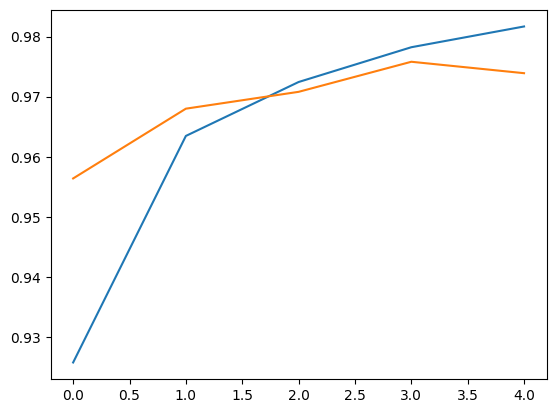

In [28]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])